In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_inaccuracy

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_to_test = df.copy()

adding 100% of inaccuracies in avg_glucose_level values

ADDING 100% TO FEATURE: avg_glucose_level
--------------------------------------
Modifying 9363 rows in column 'avg_glucose_level'
Rows to modify: [2032, 1717, 1018, 3423, 243, 5280, 3533, 6445, 9229, 620, 6339, 3867, 3094, 5158, 5890, 9169, 6002, 7953, 5817, 5682, 1875, 4312, 3730, 5513, 2114, 1001, 3159, 6625, 4360, 2182, 226, 5801, 4769, 161, 2937, 775, 8192, 8559, 4007, 3513, 2628, 4494, 7593, 3622, 2582, 5437, 3989, 82, 4956, 475, 6906, 1108, 2783, 1793, 7345, 5643, 6441, 230, 6708, 1349, 5412, 6187, 5365, 3613, 5202, 5903, 8145, 8907, 510, 6935, 6523, 4679, 1131, 1206, 4830, 9248, 1295, 8060, 9209, 2849, 4416, 4168, 1424, 8637, 353, 6409, 3998, 1836, 4202, 5432, 4652, 5116, 4634, 3991, 6102, 288, 2485, 2120, 4265, 5774, 1682, 6914, 8117, 765, 6215, 7328, 3046, 5310, 703, 6762, 5440, 5195, 809, 5462, 7870, 457, 3396, 4709, 8835, 6580, 3811, 8642, 3250, 589, 2046, 2980, 8440, 7185, 4189, 4406, 645, 4734, 7455, 6130, 1347, 1889, 3859, 4098, 6220, 5111, 557, 7652, 6890, 841, 1339, 57

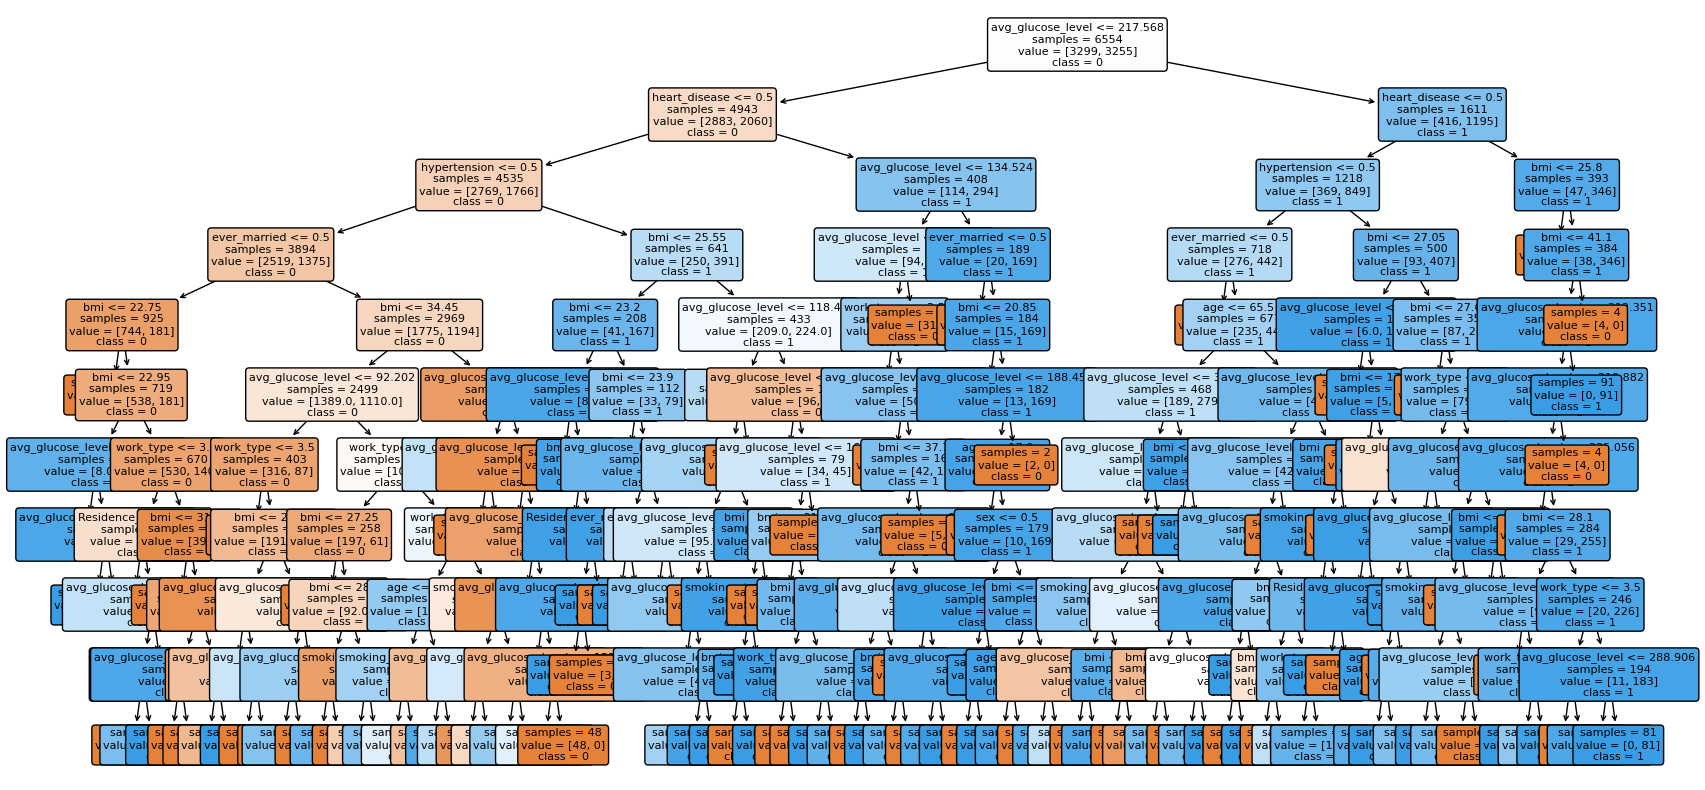

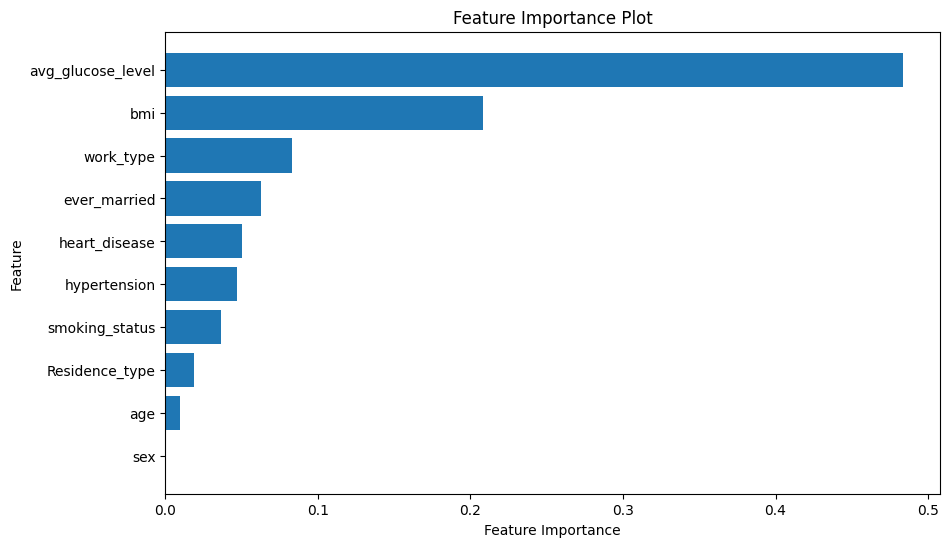

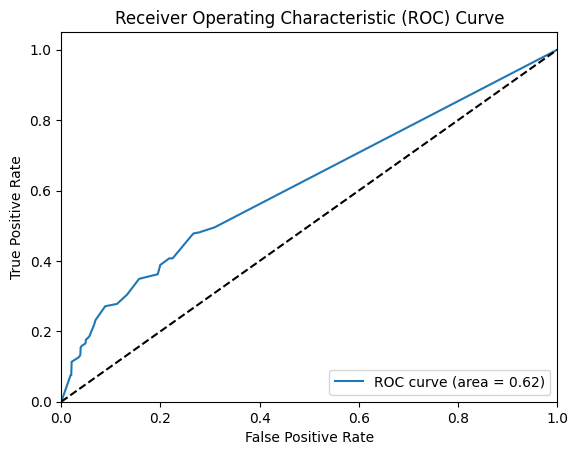

AUC Score: 0.6150726511981742


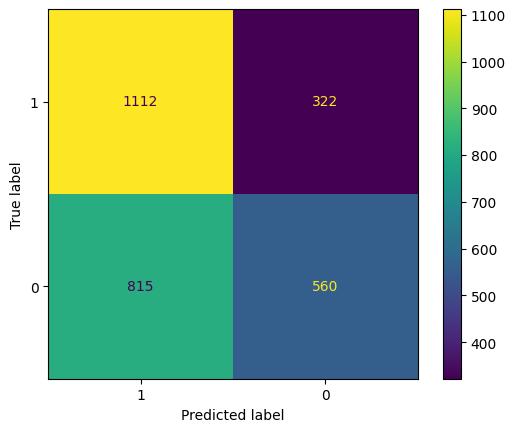

Accuracy for each fold: [0.8469750889679716, 0.7722419928825622, 0.797153024911032, 0.8149466192170819, 0.8505338078291815, 0.8220640569395018, 0.7259786476868327, 0.8505338078291815, 0.8398576512455516, 0.75]
Mean accuracy: 0.8070284697508898
95% confidence interval: (0.7751465624887195, 0.8389103770130601)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


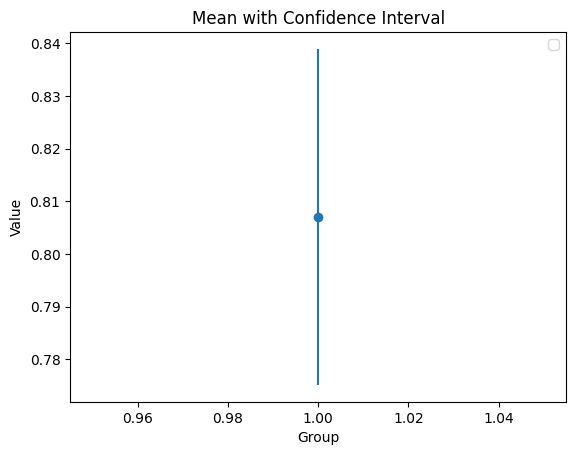


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1434
           1       0.70      0.54      0.61      1375

    accuracy                           0.66      2809
   macro avg       0.67      0.66      0.66      2809
weighted avg       0.67      0.66      0.66      2809



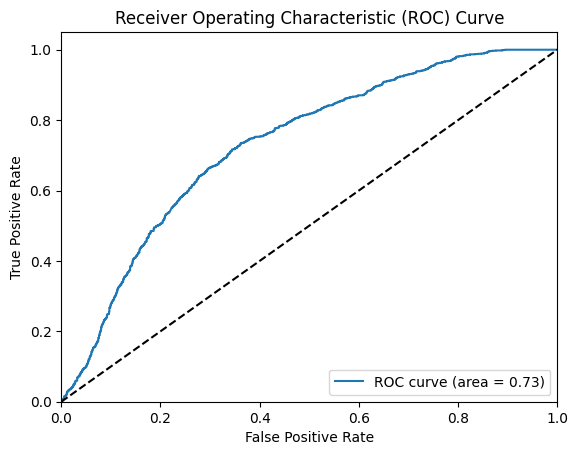

AUC Score: 0.7307878787878789


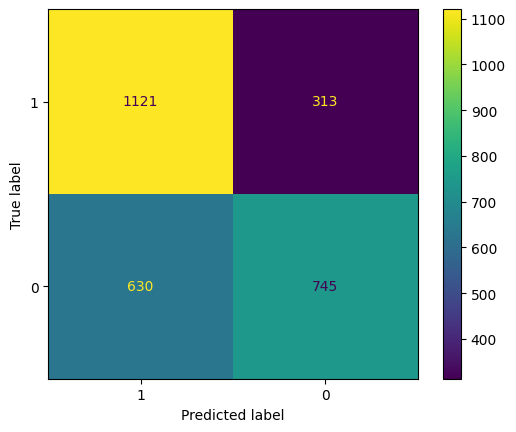

In [2]:

print('ADDING 100% TO FEATURE: avg_glucose_level')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level', df, 100)

print('\nDECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_to_test)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
#mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_to_test)


adding 100% of inaccuracies in bmi

ADDING 100% TO FEATURE: bmi
--------------------------------------
Modifying 9363 rows in column 'bmi'
Rows to modify: [2050, 8270, 9345, 7177, 4767, 8802, 2395, 6010, 7104, 4951, 3054, 697, 7042, 6947, 8885, 5274, 7158, 5014, 6837, 5402, 7618, 1986, 7483, 299, 4441, 9112, 5624, 7133, 8464, 6511, 2198, 4601, 5703, 9357, 3540, 8792, 9102, 2773, 8982, 430, 9246, 8111, 3831, 3329, 1354, 650, 1706, 4201, 7577, 5519, 68, 2747, 6649, 7979, 7226, 8091, 1372, 2904, 2326, 7745, 3081, 2958, 3269, 793, 618, 9027, 8627, 1954, 1266, 3868, 7064, 1429, 5304, 3180, 6736, 2295, 5917, 6465, 9260, 5438, 4272, 1648, 415, 2954, 5049, 8888, 4269, 2586, 1904, 4118, 5498, 7760, 4681, 4475, 5399, 1657, 572, 6925, 307, 8503, 6248, 6807, 2441, 434, 5347, 1376, 6357, 8530, 7782, 2058, 110, 9068, 3285, 9006, 2698, 1518, 9154, 4749, 2044, 7939, 2657, 7416, 2002, 5398, 9008, 8700, 2631, 7702, 7556, 1748, 921, 7289, 4009, 8449, 2916, 1816, 7493, 5370, 1023, 1044, 3568, 348, 2752, 3577, 4729, 8094, 7943, 7861, 4072, 7

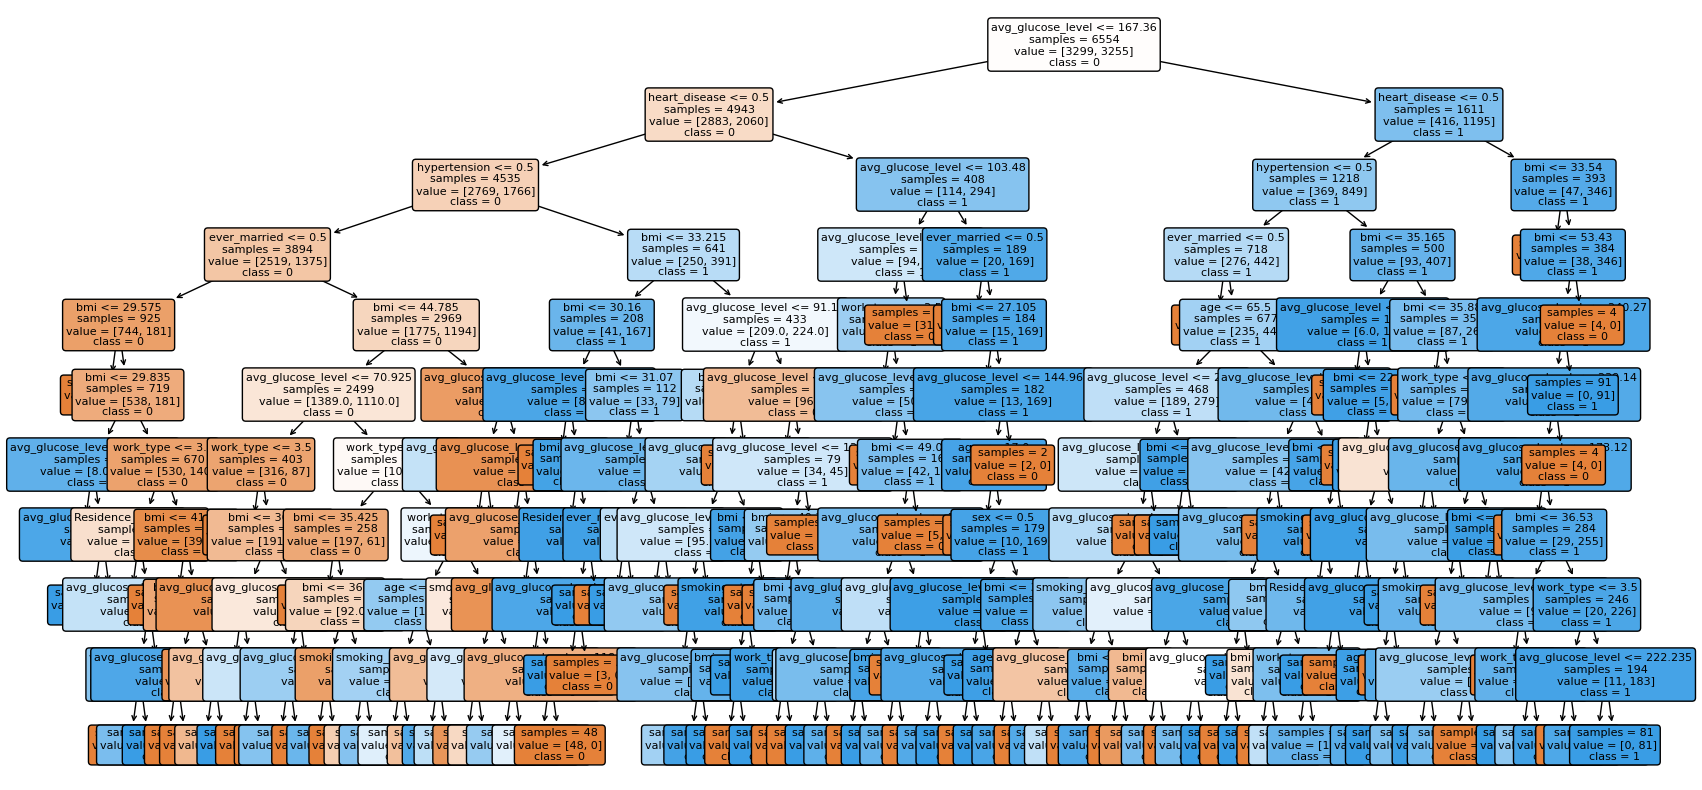

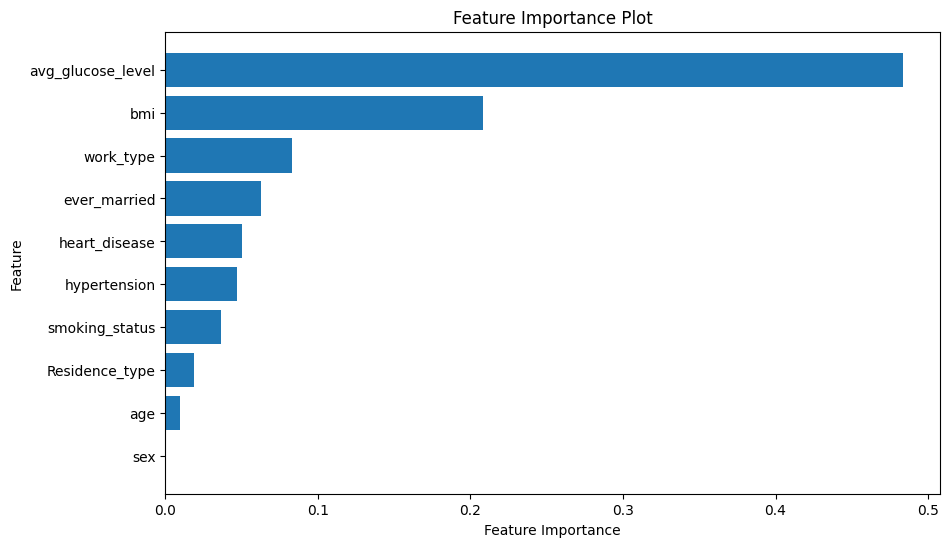

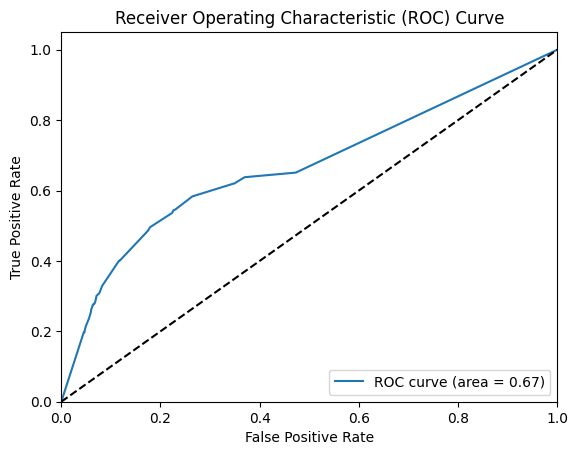

AUC Score: 0.6661420058323824


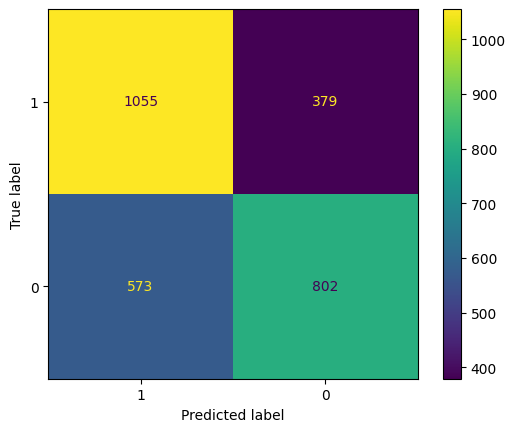

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7900355871886121, 0.8042704626334519, 0.8078291814946619, 0.8042704626334519, 0.8398576512455516, 0.8042704626334519, 0.7935943060498221, 0.8398576512455516, 0.797153024911032, 0.85]
Mean accuracy: 0.8131138790035587
95% confidence interval: (0.7976200549486394, 0.828607703058478)


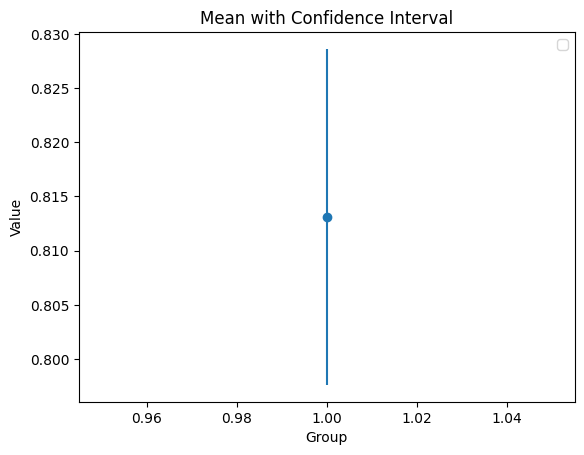


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.58      0.77      0.66      1434
           1       0.63      0.42      0.50      1375

    accuracy                           0.60      2809
   macro avg       0.61      0.59      0.58      2809
weighted avg       0.61      0.60      0.58      2809



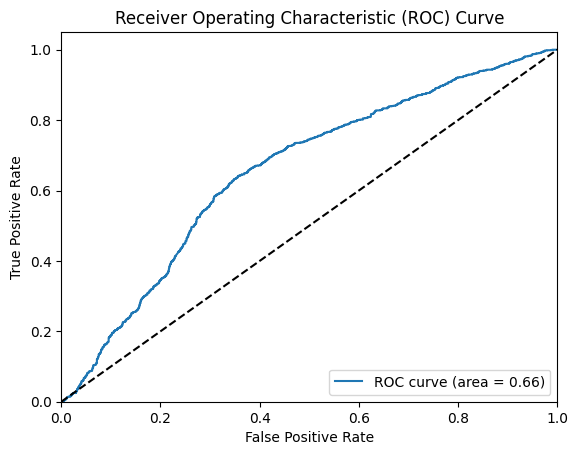

AUC Score: 0.6554263978699124


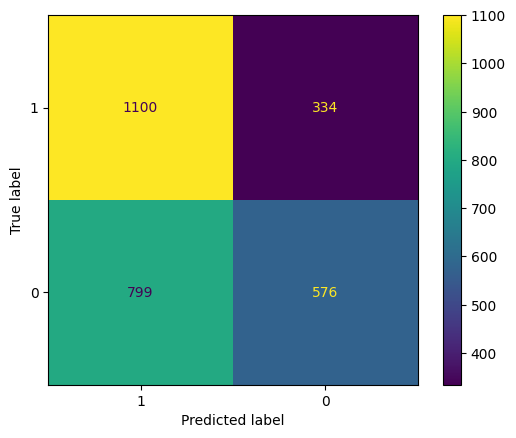

In [3]:
print('ADDING 100% TO FEATURE: bmi')
print('--------------------------------------')
df_modified= util_inaccuracy.modify_values('bmi',df, 100)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
#mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

inaccuracies on bmi and avg_glucose_level features

ADDING 100% TO FEATURE: avg_glucose_level & bmi
--------------------------------------
Modifying 9363 rows in column 'avg_glucose_level'
Rows to modify: [6957, 1158, 1711, 2663, 8791, 6001, 5120, 2490, 1418, 6441, 5357, 4518, 1033, 4606, 279, 4970, 7197, 4197, 8708, 2494, 9297, 8532, 8250, 3396, 2321, 4135, 7628, 6030, 2953, 158, 5464, 7779, 2127, 7803, 5171, 5187, 1337, 3355, 2915, 7382, 6433, 150, 1285, 1171, 6587, 2007, 5330, 5057, 5087, 6910, 5924, 5194, 2828, 9134, 6718, 748, 8212, 9252, 8126, 8057, 1126, 4034, 4502, 9204, 8366, 6092, 9305, 6541, 2591, 8055, 2176, 8587, 5593, 6324, 3408, 2264, 1415, 65, 4106, 4274, 5458, 6698, 6825, 220, 4167, 8859, 1670, 8418, 6219, 6830, 757, 1742, 8275, 5442, 308, 8484, 6397, 4428, 1614, 1703, 8162, 2643, 7377, 5465, 4094, 180, 2403, 5040, 5947, 3012, 751, 5726, 3872, 7054, 4430, 2556, 2791, 3385, 7911, 1960, 125, 8516, 2068, 6472, 5374, 6183, 552, 1277, 7036, 4566, 3757, 742, 8432, 30, 1900, 72, 7227, 1593, 648, 1607, 321, 8201, 768, 246, 56, 

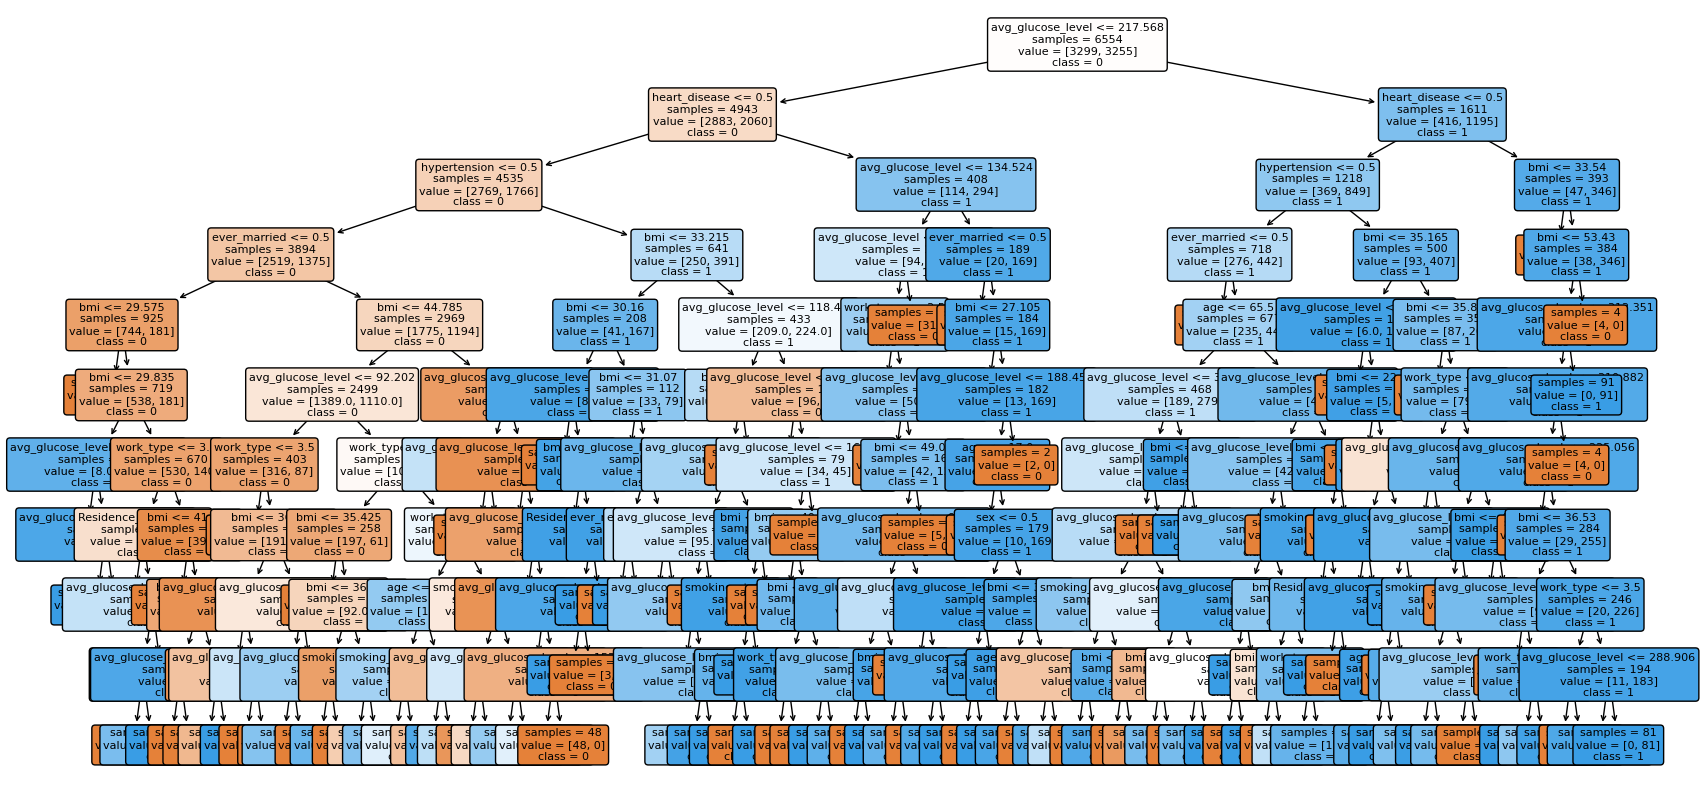

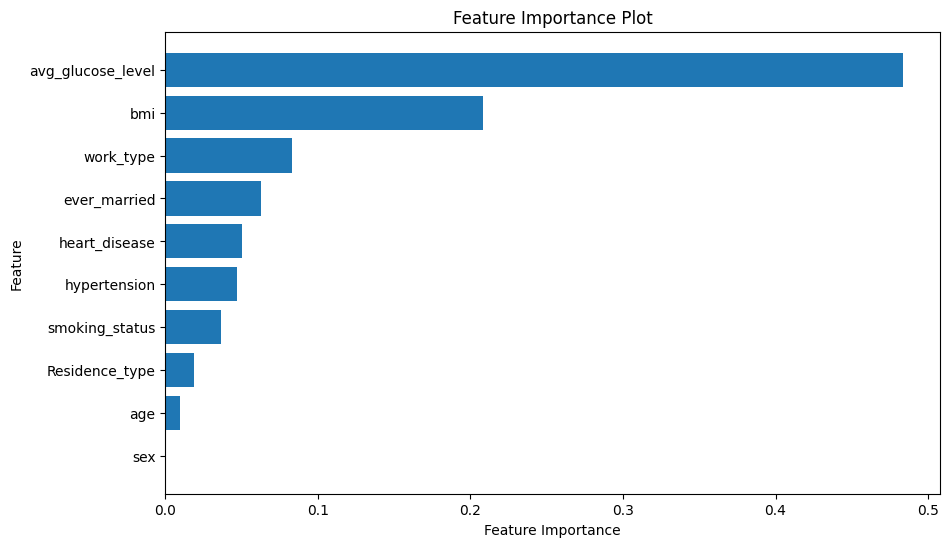

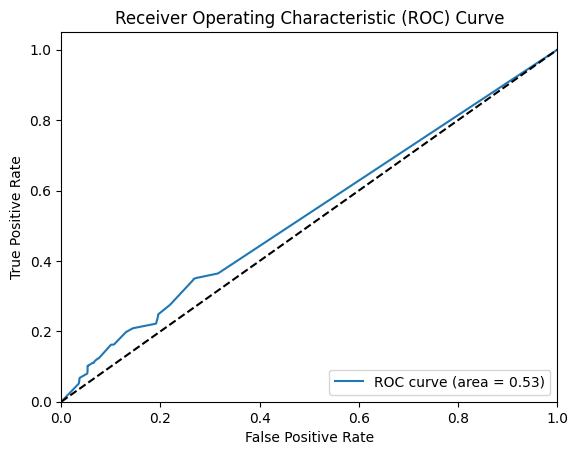

AUC Score: 0.5327280334728034


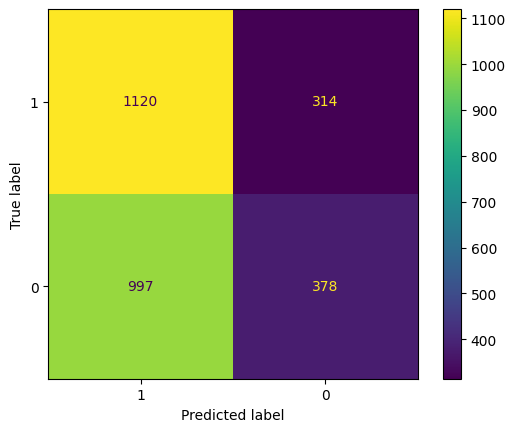

Accuracy for each fold: [0.8434163701067615, 0.8256227758007118, 0.8505338078291815, 0.8149466192170819, 0.8362989323843416, 0.8078291814946619, 0.8469750889679716, 0.8113879003558719, 0.8256227758007118, 0.8321428571428572]
Mean accuracy: 0.8294776309100153
95% confidence interval: (0.8187229047313669, 0.8402323570886636)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


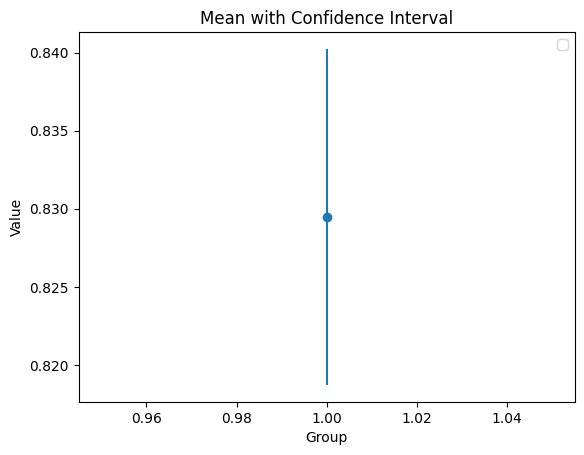


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      1434
           1       0.61      0.33      0.43      1375

    accuracy                           0.57      2809
   macro avg       0.58      0.56      0.54      2809
weighted avg       0.58      0.57      0.54      2809



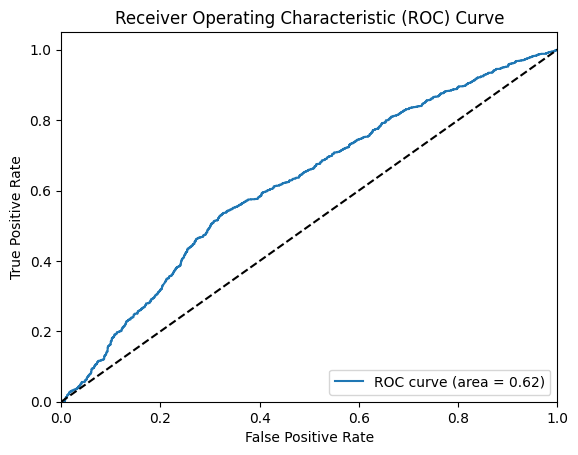

AUC Score: 0.616120197793838


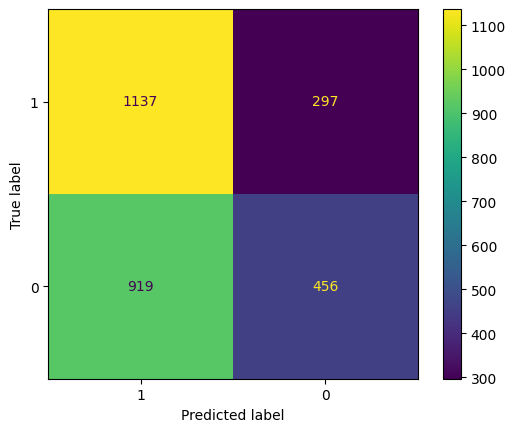

In [4]:
print('ADDING 100% TO FEATURE: avg_glucose_level & bmi')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 100)
df_modified = util_inaccuracy.modify_values('bmi',df_modified, 100)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
#mean_accuracy_svm_bmi_glucose, confidence_interval_svm_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

adding inaccuracies to non binary features

ADDING 100% TO MODIFIABLE FEATURES
--------------------------------------
Modifying 9363 rows in column 'avg_glucose_level'
Rows to modify: [298, 3770, 6396, 4496, 5491, 7646, 2102, 7446, 1038, 1027, 8817, 2076, 960, 5406, 6772, 7027, 1885, 5404, 5780, 8956, 6088, 4610, 2464, 5243, 5598, 5192, 5665, 5472, 8561, 1218, 4222, 487, 8702, 3672, 2691, 2560, 4110, 3704, 8931, 3599, 4621, 5469, 2986, 7738, 9288, 3438, 6481, 6872, 2720, 7289, 1843, 8088, 1960, 3127, 8497, 3994, 1988, 2258, 9251, 7550, 2623, 5129, 2992, 601, 6132, 5195, 4438, 540, 4129, 6130, 2466, 3536, 609, 6483, 5830, 5122, 5106, 209, 2824, 2538, 2585, 9325, 9132, 4009, 1275, 8741, 4356, 9005, 5278, 6814, 7532, 1416, 8337, 8344, 59, 3397, 2576, 1303, 4743, 1727, 2100, 3408, 69, 2993, 1229, 1862, 3573, 8554, 8721, 6570, 3263, 3567, 1291, 4793, 6529, 4151, 4212, 5952, 6890, 5545, 6045, 7542, 1612, 8168, 957, 6186, 6810, 3067, 1821, 1272, 7869, 2626, 9208, 214, 7897, 1114, 668, 5745, 6981, 5694, 3820, 9237, 5499, 3110, 2808, 548

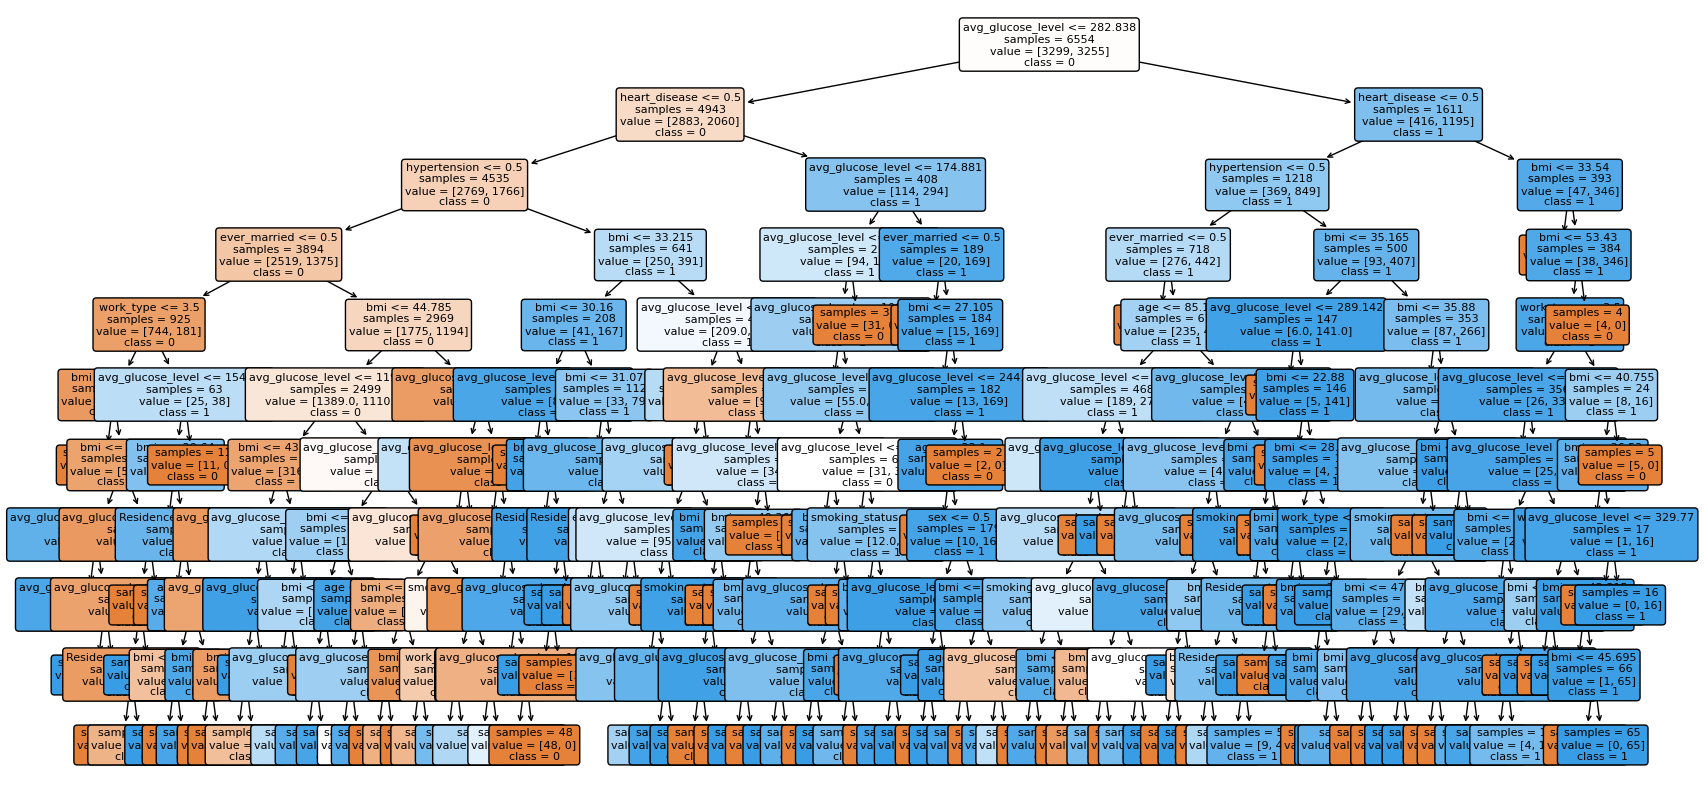

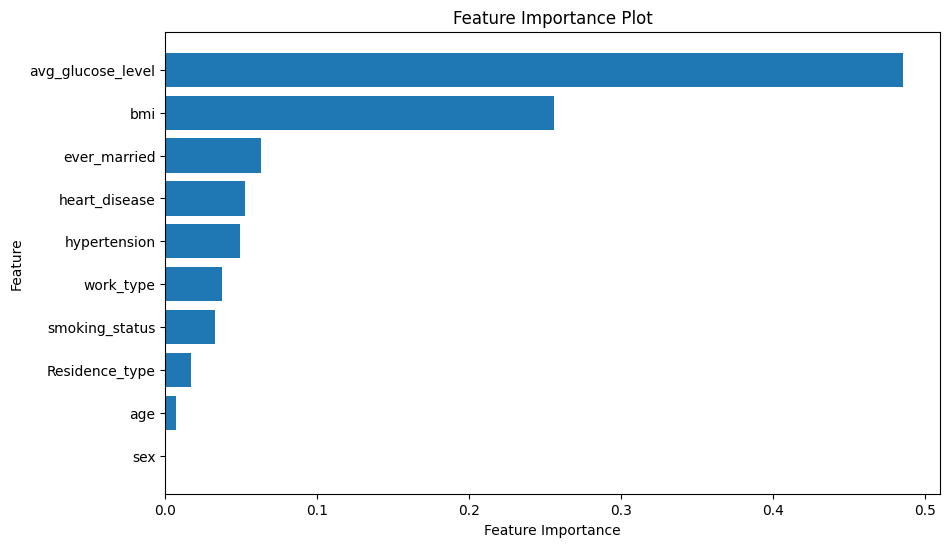

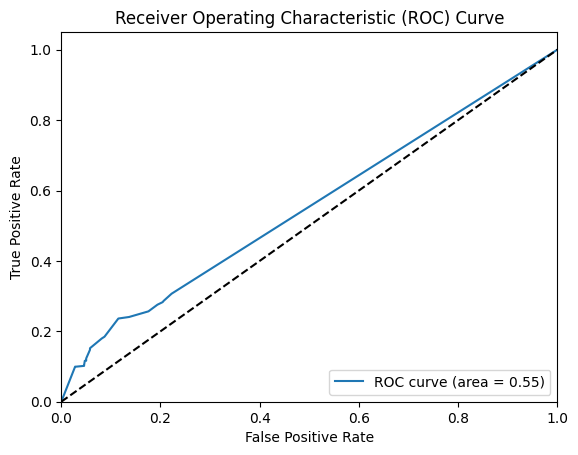

AUC Score: 0.5516132876886016


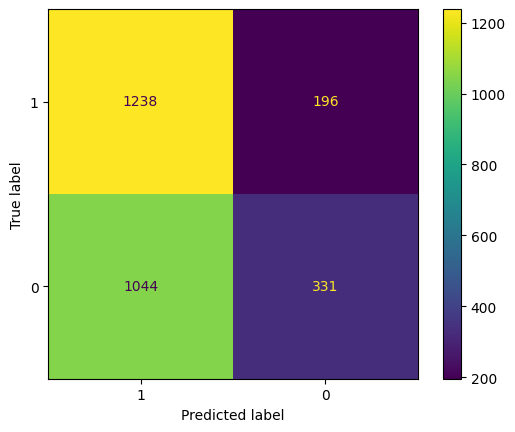

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7758007117437722, 0.800711743772242, 0.8149466192170819, 0.8220640569395018, 0.8683274021352313, 0.8113879003558719, 0.8113879003558719, 0.8185053380782918, 0.8113879003558719, 0.7857142857142857]
Mean accuracy: 0.8120233858668022
95% confidence interval: (0.7944118890657829, 0.8296348826678216)


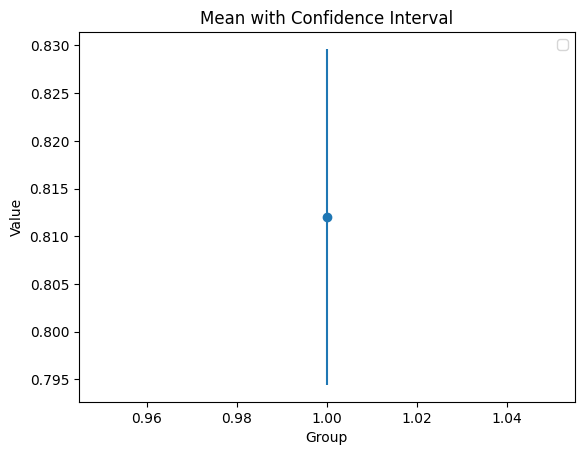


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.52      0.74      0.62      1434
           1       0.53      0.29      0.38      1375

    accuracy                           0.52      2809
   macro avg       0.52      0.52      0.50      2809
weighted avg       0.52      0.52      0.50      2809



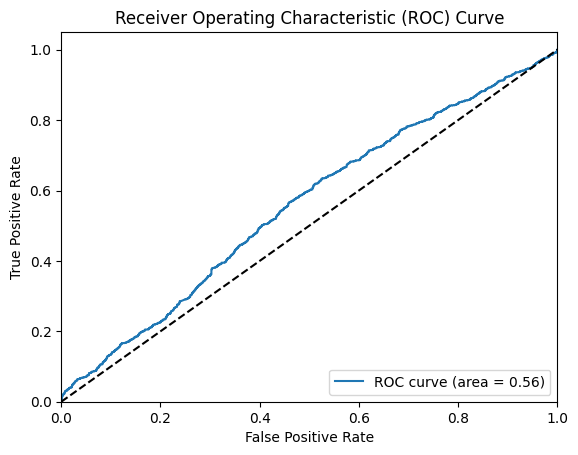

AUC Score: 0.5562895904653227


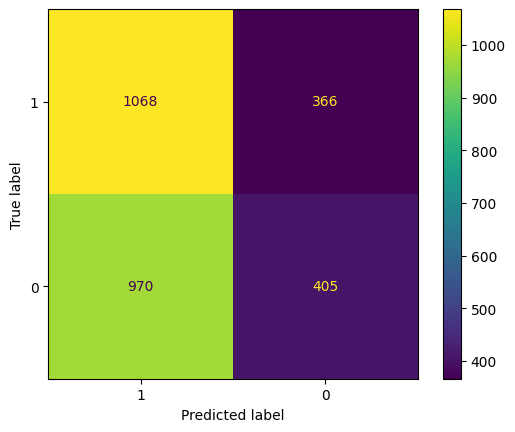

In [5]:
print('ADDING 100% TO MODIFIABLE FEATURES')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 100)
for column in ['work_type','age','bmi', 'avg_glucose_level']:
    df_modified = util_inaccuracy.modify_values(column,df_modified, 100)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_dt, y_test_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt, confidence_interval_dt = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
#mean_accuracy_svm, confidence_interval_svm = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

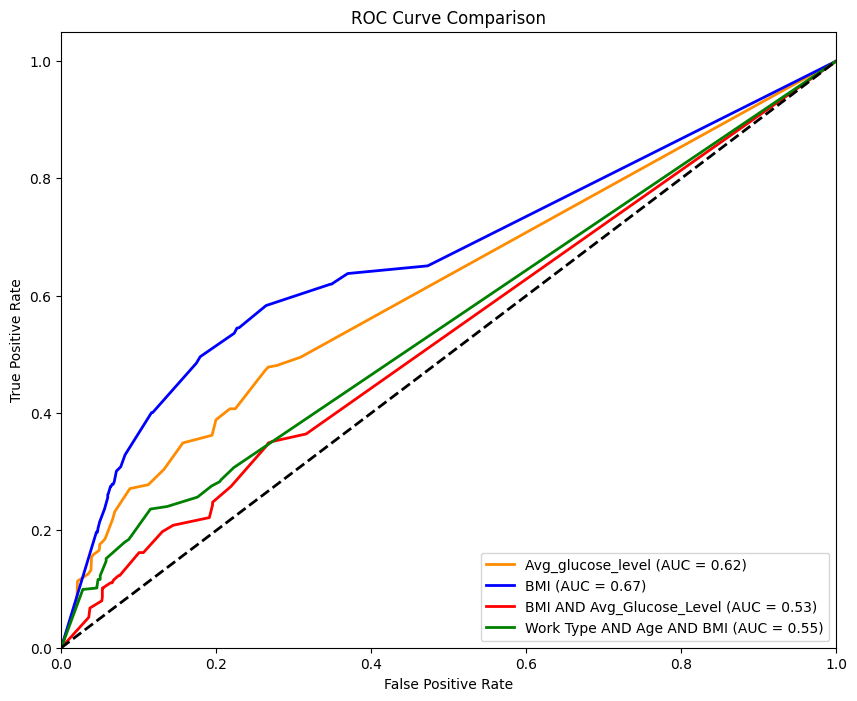

In [6]:
roc_results = [
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_dt, 'Work Type AND Age AND BMI')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC CURVE - Support Vector Machine

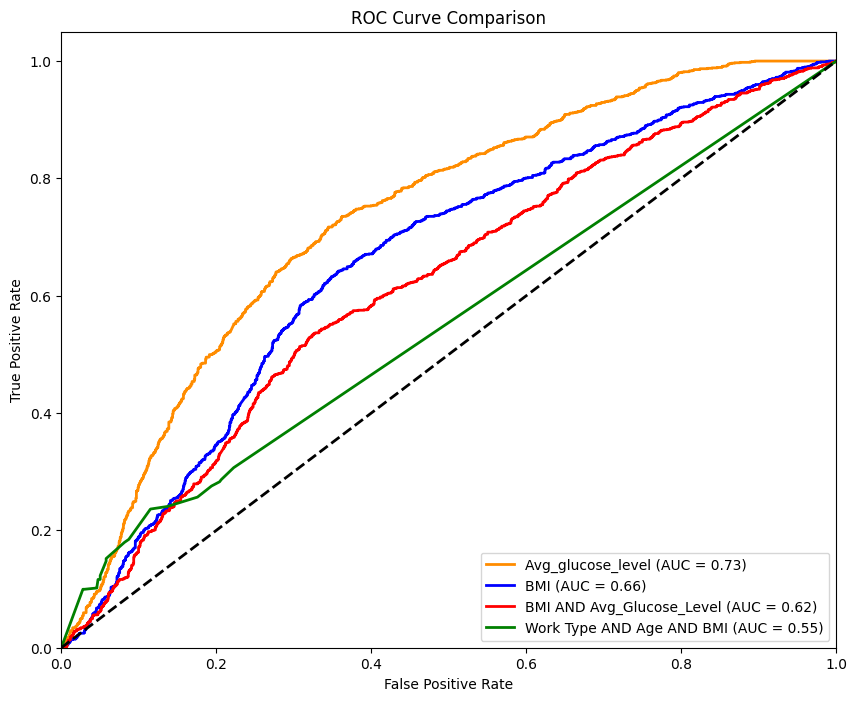

In [7]:
roc_results = [
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_svm, 'Work Type AND Age AND BMI')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

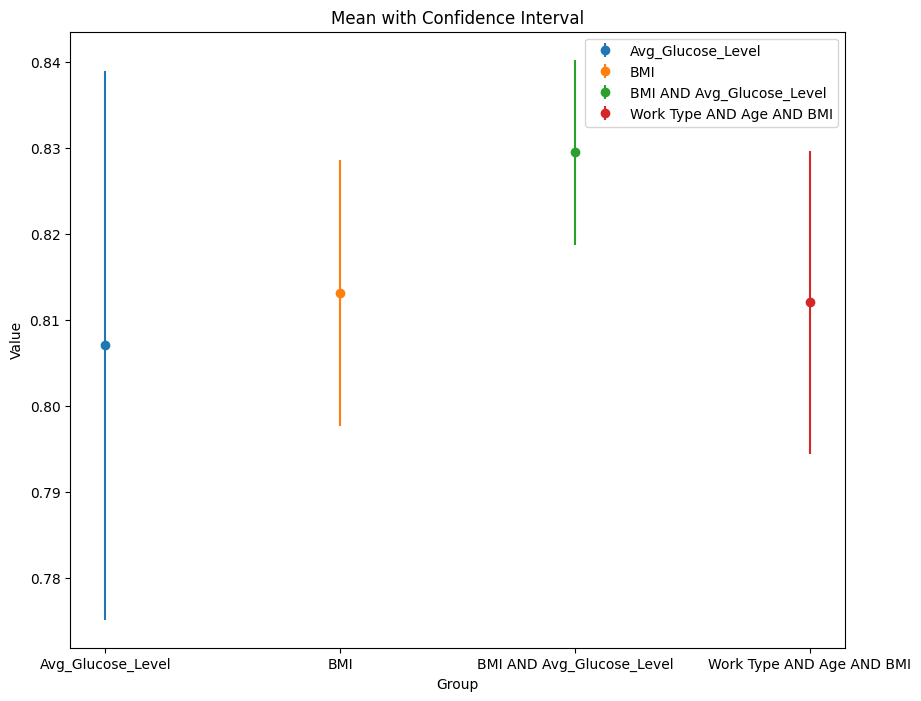

In [8]:
model_results = [
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('BMI AND Avg_Glucose_Level', mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose),
    ('Work Type AND Age AND BMI', mean_accuracy_dt, confidence_interval_dt)
]
ML_algorithms.plot_confidence_intervals(model_results)